## FIRST ATTEMPT TO CNN

In this framework, I will try to built a first attempt to the neural networ requested by the project, so I try to answer to the first part of the project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from keras.models import Sequential
from keras.layers import Dense
import os
import cv2


from keras.utils import to_categorical #to create dummy variable
from keras.layers import Conv2D,Flatten,Dropout, MaxPooling2D,AveragePooling2D

Using TensorFlow backend.


## PREPROCESSING DEI  DATI 

The most popular and de facto standard library in Python for loading and working with image data is Pillow. Pillow is an updated version of the Python Image Library, or PIL, and supports a range of simple and sophisticated image manipulation functionality.

In [2]:
import import_ipynb
import utils

importing Jupyter notebook from utils.ipynb


In [3]:
# SOME IMPORTANT GLOBAL VARIABLE
base_dir = '../images/'
train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')
direc = '../images/train/'
labels = ["Bedroom","Coast","Forest","HighWay","Industrial","InsideCity","Kitchen","LivingRoom","Mountain","Office","OpenCountry","Store","Street","Suburb","TallBuilding"]
list_categories = ['../images/train/{}'.format(i) for i in os.listdir(train_dir) if i!='.DS_Store']




In [4]:
list_of_images = utils.list_of_path(labels,'../images/train/')
train_data,train_labels= utils.read_and_process_images(list_of_images)



In [5]:
# preparo i testa data 
test_path = '../images/train/'
list_of_images_test = utils.list_of_path(labels,'../images/test/')
test_data,test_labels = utils.read_and_process_images(list_of_images_test)

In [6]:
train_data = train_data.reshape(train_data.shape[0],train_data.shape[1],train_data.shape[2],1)
test_data = test_data.reshape(test_data.shape[0],test_data.shape[1],test_data.shape[2],1)

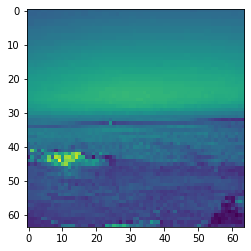

In [7]:
plt.imshow(train_data[0,:,:,0])

In [8]:
from keras.utils import to_categorical
from keras import optimizers

In [10]:
train_labels_dummy = to_categorical(train_labels,15)

test_labels_dummy = to_categorical(test_labels,15)

## DEFINITION OF THE MODEL 

In [37]:
sgd = optimizers.SGD(momentum=0.9,nesterov=True)

In [38]:
from keras import initializers

In [39]:
norm = initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)

In [40]:

#adam = optimizers.Adam()
model = Sequential()
#first convolutional layer
model.add(Conv2D(filters=8,kernel_size=3,padding = 'valid',activation='relu',input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.3))
#secondo convolutional layer
model.add(Conv2D(filters=16,kernel_size=3,strides=2,padding='valid',activation='relu',input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.3))
#third convolutional layer
model.add(Conv2D(filters=32,kernel_size=3,padding='valid',activation='relu',input_shape=(64,64,1)))
model.add(Flatten())
model.add(Dense(15,activation='relu',kernel_initializer=norm,bias_initializer='zeros'))
model.add(Dense(15,activation='softmax'))

#classification output
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics = ['accuracy'])




In [41]:
from keras.callbacks import EarlyStopping
from keras.callbacks import History
history = History()
earlyStopping = EarlyStopping(min_delta=0.001,patience = 10)


model.fit(train_data,train_labels_dummy,batch_size=32,epochs=100,validation_split=0.15,shuffle=True,callbacks=[earlyStopping,history])


Train on 1275 samples, validate on 225 samples
Epoch 1/100
1275/1275 [==============================] - 1s 1ms/step - loss: 2.7091 - accuracy: 0.0651 - val_loss: 2.7098 - val_accuracy: 0.0489
Epoch 2/100
1275/1275 [==============================] - 1s 797us/step - loss: 2.7081 - accuracy: 0.0690 - val_loss: 2.7114 - val_accuracy: 0.0400
Epoch 3/100
1275/1275 [==============================] - 1s 824us/step - loss: 2.7064 - accuracy: 0.0784 - val_loss: 2.7131 - val_accuracy: 0.0400
Epoch 4/100
1275/1275 [==============================] - 1s 852us/step - loss: 2.7036 - accuracy: 0.0847 - val_loss: 2.7110 - val_accuracy: 0.0356
Epoch 5/100
1275/1275 [==============================] - 1s 893us/step - loss: 2.6993 - accuracy: 0.0863 - val_loss: 2.7060 - val_accuracy: 0.0578
Epoch 6/100
1275/1275 [==============================] - 1s 829us/step - loss: 2.6872 - accuracy: 0.0980 - val_loss: 2.6934 - val_accuracy: 0.1022
Epoch 7/100
1275/1275 [==============================] - 1s 905us/step - 

In [42]:
model.evaluate(test_data,test_labels_dummy)

2985/2985 [==============================] - 1s 273us/step


[1.9735066927457774, 0.3822445571422577]

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
y_pred = model.predict_classes(test_data)

In [45]:
cm = confusion_matrix(test_labels,y_pred)

In [46]:
import itertools

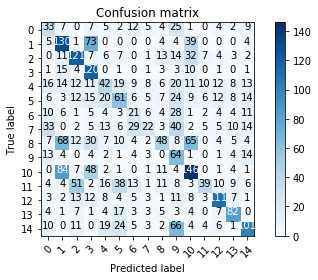

In [47]:
utils.plot_confusion_matrix(cm,['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14'])


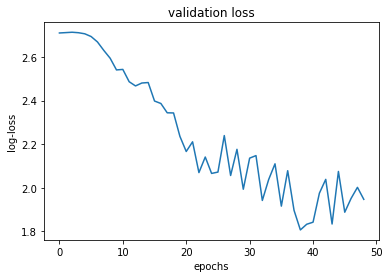

In [48]:
plt.title("validation loss")
plt.xlabel("epochs")
plt.ylabel("log-loss")
plt.plot(history.history['val_loss'])


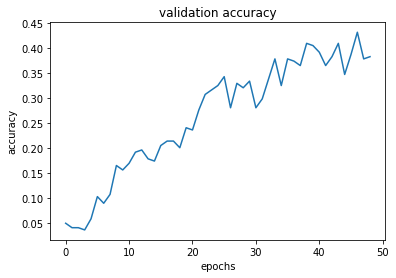

In [49]:

plt.title("validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['val_accuracy'])


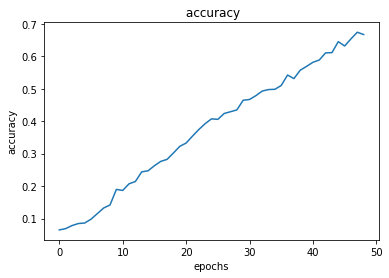

In [50]:
plt.title(" accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['accuracy'])

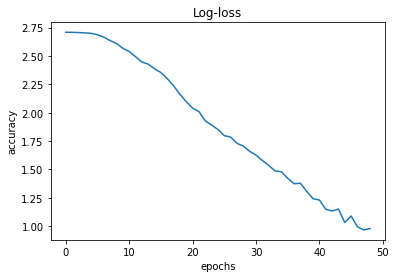

In [51]:
plt.title("Log-loss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['loss'])